# 4) Data analysis

Using the data prepared for analysis from the `data/processed/` directory, answer the following questions before you give the HR team your recommendation:

- How many jobs for a particular position were found?
- What is the average salary for each job?
- Which city has the most job offers?
- Where is the highest rate offered?
- What is the difference between the offer for a regular and a senior?
- What is the lowest possible cost to hire a team consisting of a data analyst, data engineer and data scientist?
- Is it possible for the team to be formed in a single city? If so, where would it be cheapest?

In addition, visualize subsections 1-5 using the chart types of your choice.

Use the experience gained while working on the data from 'NoFluffJobs' to consider what simplifications have been made and how they potentially could influence the full picture of the analysis.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "data/processed/job_offers_2024_02_20.csv"

#load data
df = pd.read_csv(
  file_path,
  sep = ";",
  encoding = "UTF-8",
  decimal = "."
)

df.head(2)

,index,name,company,technology,job,location,salary,salary_avg,location_city,location_country,is_senior
0,0,md senior migration & development analyst - re...,Link Group,"['SQL', 'VBA', 'Excel', 'MS Access']",data analyst,"{'city': 'remote', 'country': 'N/A'}","{'low': 18500, 'high': 25500, 'currency': 'PLN'}",22000.0,NaN,NaN,1
1,1,data analyst (sap),Team Connect Sp. z o.o.,"['SAP', 'Data models', 'SAP BW', 'Data visuali...",data analyst,"{'city': 'remote', 'country': 'N/A'}","{'low': 23500, 'high': 28500, 'currency': 'PLN'}",26000.0,NaN,NaN,0


In [3]:
### How many jobs for a particular position were found?

jobs = df["job"].unique() #list of job names
counts = list((df["job"].value_counts()))  #number of offers in given groups

print(f"For the position of data analyst {counts[0]} offers were found, of data engineer {counts[1]} offers and of data scientist {counts[2]} offers.")

For the position of data analyst 55 offers were found, of data engineer 35 offers and of data scientist 31 offers.


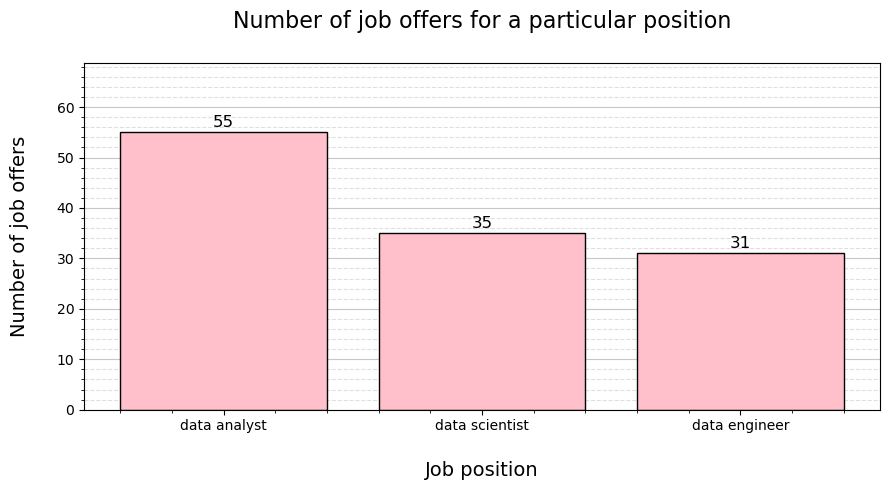

In [4]:
#Plot

fig, ax = plt.subplots(figsize=(9, 5))

ax.set_axisbelow(True)
plt.bar(jobs, counts, color = "pink", edgecolor = "black")
plt.title("Number of job offers for a particular position\n", fontsize = 16) 
plt.ylabel("Number of job offers\n", fontsize = 14)
plt.xlabel("\nJob position", fontsize = 14)
plt.minorticks_on()
plt.ylim(0,max(counts)*1.25)
plt.grid(axis = "y", alpha = 0.7)
plt.grid(which = "minor", axis = "y" , linestyle = "--", alpha=0.4) 
    
for i, value in enumerate(jobs):
    plt.text(i, counts[i] + 0.5, str(counts[i]), ha = "center", va = "bottom", fontsize = 12)

plt.tight_layout()
plt.show()

In [5]:
### What is the average salary for each job?

df_by_job = df.groupby("job")
average_salary = list(df_by_job["salary_avg"].mean())

print(f"The average salary for the position of data analyst is {round(average_salary[0],2)} PLN, of data engineer {round(average_salary[1],2)} PLN a of data scientist {round(average_salary[2],2)} PLN.")

The average salary for the position of data analyst is 22596.43 PLN, of data engineer 24124.11 PLN a of data scientist 22899.26 PLN.


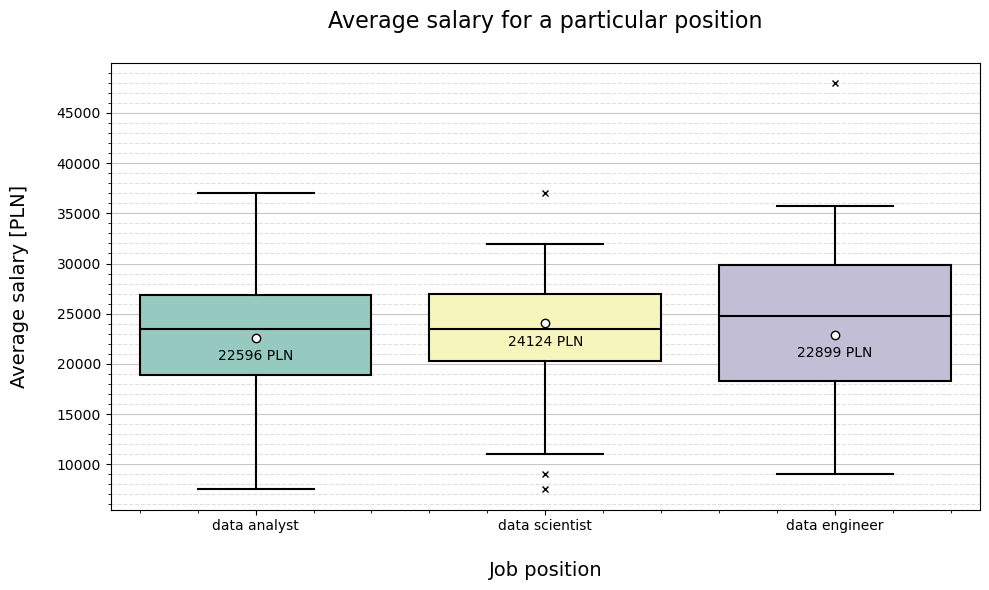

In [6]:
#Plot

col_palette = sns.color_palette("Set3") 

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_axisbelow(True)
sns.boxplot(y = "salary_avg", x = "job", data = df,
            boxprops = {"edgecolor":"black"},
            medianprops = {"color":"black"},
            whiskerprops = {"color":"black"},
            capprops = {"color":"black"},
            flierprops={"marker": "x", "markeredgecolor":"black"},
            palette = col_palette)

plt.minorticks_on()
plt.grid(axis = "y", alpha = 0.7)
plt.grid(which = "minor", axis = "y" , linestyle = "--", alpha=0.4) 
plt.scatter(jobs, average_salary, marker='o', edgecolor = "black", color = "white")  

for i, mean in enumerate(average_salary):
    plt.text(i, mean*0.95, f"{mean:.0f} PLN", ha = "center", va = "top", color = "black", fontsize = 10)
    
plt.title('Average salary for a particular position\n', fontsize = 16)
plt.ylabel("Average salary [PLN]\n", fontsize = 14)
plt.xlabel("\nJob position", fontsize = 14)

plt.tight_layout()
plt.show()

In [7]:
### Which city has the most job offers?

df["location"] = [eval(i) for i in df["location"]]  #string back to a dictionary (object)

cities = [df["location"][i]["city"].capitalize() for i, value in enumerate(df["location"])] 
cities = pd.Series(cities)
df["city"] = cities  #auxiliary column

#filter offers without 'remote'
df_wo_remote = df.loc[df["city"] != "Remote"]

#dataframe for the plot
data_counts_job_city = df_wo_remote.groupby(["city", "job"])["index"].count().reset_index() 
data_counts_job_city

,city,job,index
0,Gdańsk,data analyst,1
1,Gdańsk,data engineer,2
2,Katowice,data engineer,1
3,Kraków,data analyst,5
4,Kraków,data engineer,8
5,Kraków,data scientist,3
6,Poznań,data engineer,1
7,Warszawa,data analyst,10
8,Warszawa,data engineer,13
9,Warszawa,data scientist,7


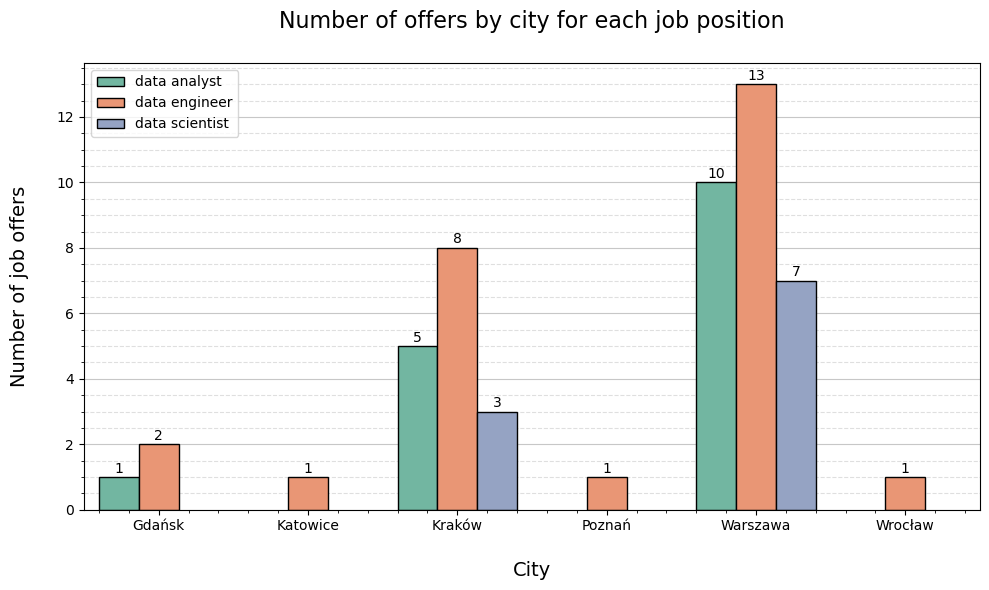

In [8]:
#Plot - Number of offers by city for each job position

col_palette = sns.color_palette("Set2") 

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = "city", y = "index", hue = "job", data = data_counts_job_city,
            edgecolor = "black", palette = col_palette)

ax.set_axisbelow(True)
plt.title("Number of offers by city for each job position\n", fontsize = 16)
plt.ylabel("Number of job offers\n", fontsize = 14)
plt.xlabel("\nCity", fontsize = 14)
plt.minorticks_on()
plt.grid(axis = "y", alpha = 0.7)
plt.grid(which = "minor", axis = "y" , linestyle = "--", alpha = 0.4)
plt.legend(loc = "upper left")

for c in ax.containers:
    labels=[round(v) if v > 0 else "" for v in c.datavalues]
    ax.bar_label(c, labels = labels, label_type = "edge", fontsize = 10, padding = 1) 

plt.tight_layout()
plt.show()


#note: the most job offers have for each position Warszawa

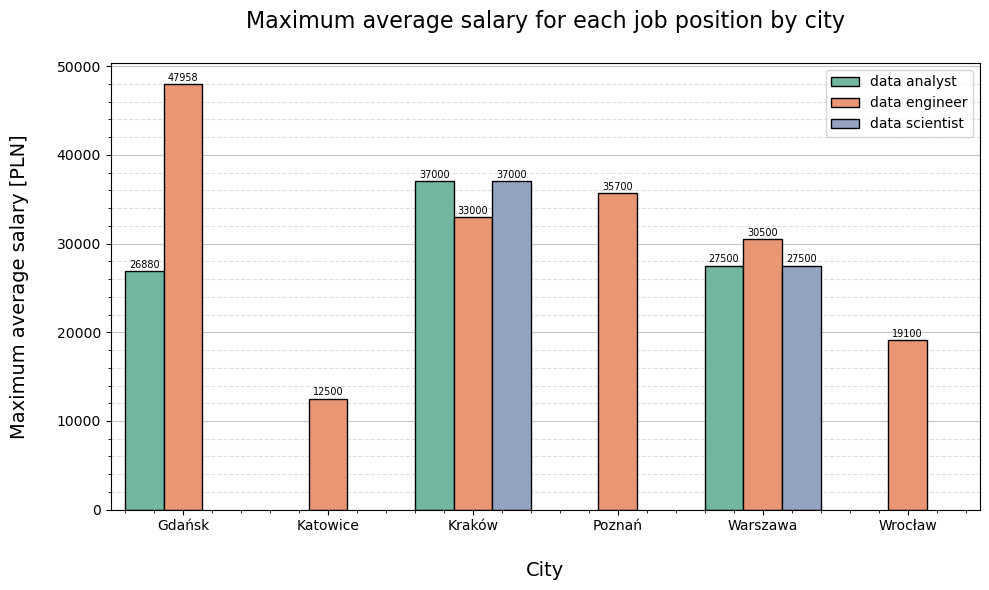

In [9]:
### Where is the highest rate offered?

data_city_job_max = df_wo_remote.groupby(["city","job"])["salary_avg"].max().reset_index()

col_palette = sns.color_palette("Set2") 

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = "city", y = "salary_avg", hue = "job", data = data_city_job_max,
            edgecolor = "black", palette = col_palette)

ax.set_axisbelow(True)
plt.title("Maximum average salary for each job position by city\n", fontsize = 16)
plt.ylabel("Maximum average salary [PLN]\n", fontsize = 14)
plt.xlabel("\nCity", fontsize = 14)
plt.minorticks_on()
plt.grid(axis = "y", alpha = 0.7)
plt.grid(which = "minor", axis = "y" , linestyle = "--", alpha = 0.4)
plt.legend(loc = "upper right")

for c in ax.containers:
    labels=[round(v) if v > 0 else "" for v in c.datavalues]
    ax.bar_label(c, labels = labels, label_type = "edge", fontsize = 7, padding = 1) 

plt.tight_layout()
plt.show()


#note: Overall, the highest salary offered is in Gdansk (for a data engineer) - it's an outlier.
#For a data analyst and data scientist it's in Krakow.

In [10]:
### What is the difference between the offer for a regular and a senior?

df["is_senior"] = df["is_senior"].replace({0: "regular", 1: "senior"})  

senior_counts = df["is_senior"].value_counts()

print(f"We have {senior_counts.iloc[0]} offers for regular position and {senior_counts.iloc[1]} for senior position")

#note: regular positions are 3,5 times more than senior positions

We have 94 offers for regular position and 27 for senior position


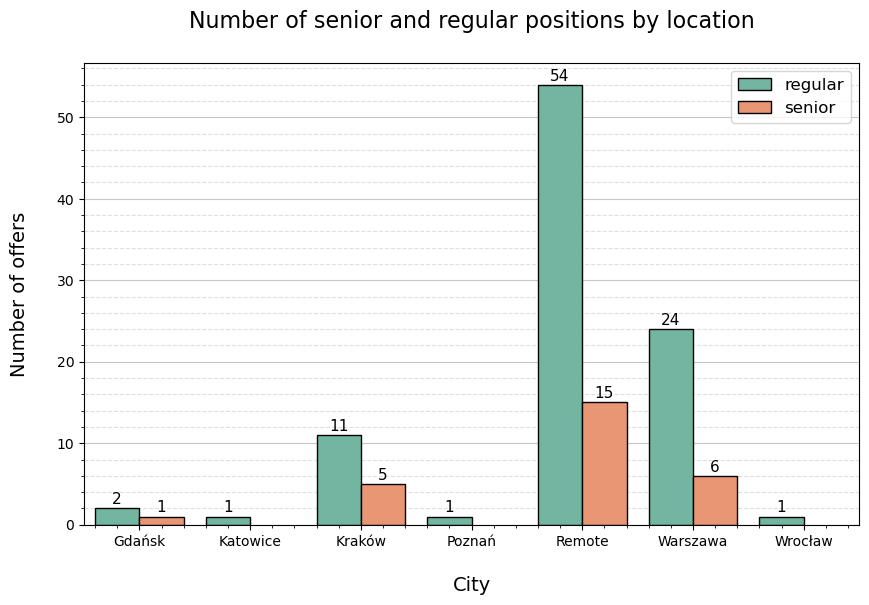

In [11]:
#Plot - Number of senior and regular positions by city

#dataframe for the plot
data_city_senior_counts = df.groupby(["city","is_senior"])["index"].count().reset_index()


col_palette = sns.color_palette("Set2") 

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = "city", y = "index", hue = "is_senior", data = data_city_senior_counts,
            edgecolor = "black", palette = col_palette)

ax.set_axisbelow(True)
plt.title("Number of senior and regular positions by location\n", fontsize=16)
plt.ylabel("Number of offers\n", fontsize=14)
plt.xlabel("\nCity", fontsize=14)
plt.minorticks_on()
plt.grid(axis = "y", alpha = 0.7)
plt.grid(which = "minor", axis = "y" , linestyle = "--", alpha=0.4)
plt.legend(loc = "upper right", fontsize = 12)

for c in ax.containers:
    labels=[round(v) if v > 0 else "" for v in c.datavalues]
    ax.bar_label(c, labels = labels, label_type = "edge", fontsize = 11, padding = 1) 
    
plt.show()

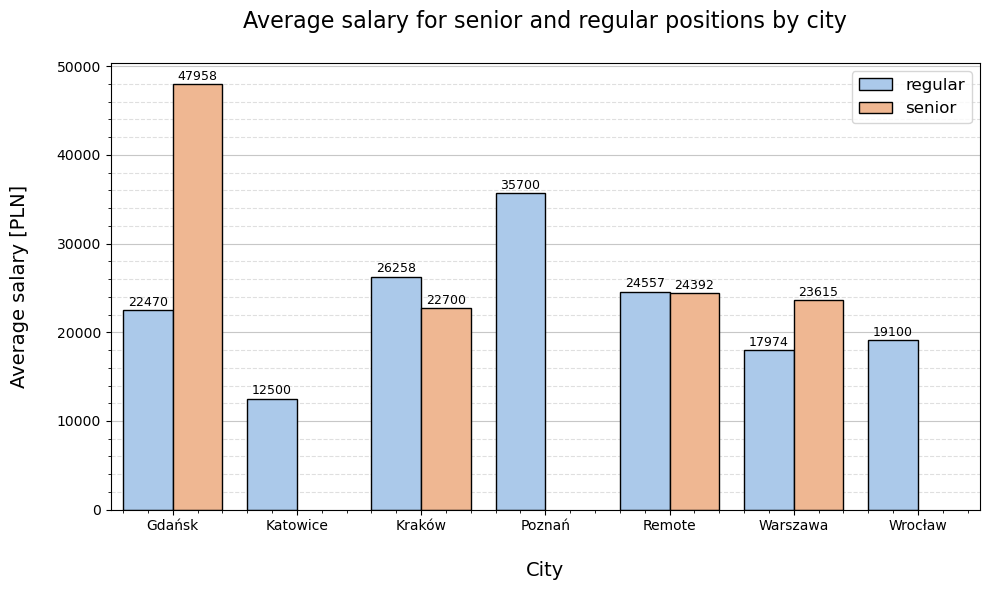

In [12]:
#Plot - Average salary for senior and regular positions by city

#dataframe for the plot
data_city_senior_mean = df.groupby(["city","is_senior"])["salary_avg"].mean().reset_index()


fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = "city", y = "salary_avg", hue = "is_senior", data = data_city_senior_mean,
            edgecolor = "black", palette = "pastel")

ax.set_axisbelow(True)
plt.title("Average salary for senior and regular positions by city\n", fontsize = 16)
plt.ylabel("Average salary [PLN]\n", fontsize = 14)
plt.xlabel("\nCity", fontsize = 14)
plt.minorticks_on()
plt.grid(axis = "y", alpha = 0.7)
plt.grid(which = "minor", axis = "y" , linestyle = "--", alpha = 0.4)
plt.legend(loc = "upper right", fontsize = 12)

for c in ax.containers:
    labels=[round(v) if v > 0 else "" for v in c.datavalues]
    ax.bar_label(c, labels = labels, label_type = "edge", fontsize = 9, padding = 1) 

plt.tight_layout()
plt.show()


#note: the highest salary offered belongs to the senior position. 
#Except for Gdansk (where we have an extreme outlier), there is not such a significant difference between average salaries.

In [13]:
###  What is the lowest possible cost to hire a team consisting of a data analyst, data engineer and data scientist?

data_job_min = df_by_job["salary_avg"].min().reset_index() 
display(data_job_min)   #lowest average salary offered for each position

print(f"The lowest possible salary costs of a team consisting of a data analyst, data engineer and data scientist is {data_job_min['salary_avg'].sum()} PLN")

,job,salary_avg
0,data analyst,7500.0
1,data engineer,9000.0
2,data scientist,7500.0


The lowest possible salary costs of a team consisting of a data analyst, data engineer and data scientist is 24000.0 PLN


In [14]:
###  Is it possible for the team to be formed in a single city? If so, where would it be cheapest?

#as we see on the barplot above ('Number of offers by city for each job position'), we can form this team only in Krakow and Warszawa

df_by_city = df.groupby("city")

df_war = df_by_city.get_group("Warszawa")
data_war_job_min = df_war.groupby("job")["salary_avg"].min().reset_index() 

df_krak = df_by_city.get_group("Kraków")
data_krak_job_min = df_krak.groupby("job")["salary_avg"].min().reset_index() 


print(f"The lowest possible salary costs of a team of a data analyst, data engineer and data scientist from Warszawa is {data_war_job_min['salary_avg'].sum()} PLN")
print(f"The lowest possible salary costs of a team of a data analyst, data engineer and data scientist from Kraków is {data_krak_job_min['salary_avg'].sum()} PLN")

if data_war_job_min['salary_avg'].sum() < data_krak_job_min['salary_avg'].sum():
    print("Cheaper team is from Warszawa")
else:
    print("Cheaper team is from Kraków")

The lowest possible salary costs of a team of a data analyst, data engineer and data scientist from Warszawa is 26000.0 PLN
The lowest possible salary costs of a team of a data analyst, data engineer and data scientist from Kraków is 44500.0 PLN
Cheaper team is from Warszawa
